# The Monte Carlo method
(a version of revised code)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

# part 1

### draw the arrangement of the nuts in a box


1.define the width and height of a box which will contain a selection of particle

2.treat the box as a grid and store each integer coordinates

3.generate the x and y coordinate of each particle in a random manner within the box

4.make sure particles do not overlap with each other

    4.1.find the square which can just fit each particles.The length of each square is the diameter of the corresponding      particle
    4.2 selecting all the coordinate inside of the square 
    4.3 remove the selected coordinates  in the square from the system, so that no particles will overlap with each other.
    


In [2]:
def condition1(r,M,coordinates,brazil_nut=False):
    """This is a function make sure particles do not overlap with each other

    1.find the square which can just fit each particles.
    The length of each square is the diameter of the corresponding particle
    2.selecting all the coordinate inside of the square 
    3.remove the selected coordinates  in the square from the system, 
    so that no particles will overlap with each other.
    r is the x and y coodinates
    M is the mass
    coordinates is the total cordinate of the system
    brazil_nut=False determines the types of particles"""

    count =0 # initial iteration
    coordinates_list = list(coordinates) #converts set into list
    found = False # define found
    while not found and count<(len(coordinates_list)): # generate particles until the system runs out of positions 
        count += 1
        coor = random.choice(coordinates_list)
        x = coor[0] #x coordinate of particle
        y = coor[1] #y coordinate of particle

        square = {(i, j) for i in range(x-r,x+r) for j in range(y-r,y+r)}
        # the square which can fit one particle
        if(square.issubset(coordinates)):# if all the points are found inside of the square
            P1=np.array([x,y,r,M,brazil_nut]) 
            #P1 is a list of array contains x,y coordinate of a nut, its radius, its mass and identity
            found = True
            return P1
    else:  #if there was no space in the box
        return 0
    

#### Code to find the largest nearest-neighbour distance between particles (that is, find the shortest distance fromeach particle to any other particle, and then find the largest of those distances.

In [3]:
# This is the code for condition 3 which is
#finding the largest nearest-neighbour distance between particles 
#that is, find the shortest distance from each particle to any other particle, and then find the largest of those distances.

def LNND(data):
    """This is the code for condition 3 which is
    finding the largest nearest-neighbour distance between particles 
    that is, find the shortest distance from each particle to any other particle, 
    and then find the largest of those distances.
    """
    List = [] # A temporary list to store information of neighbour distance
    largest=np.array([]) # A list to store information of the largest nearest neighbour distance
    
    if len(data)>1:
        for i in range (len(data)): # select the first nut from the "data " list
            for j in range(len(data)): # select the second nut from the "data" list
                if i!=j: # condition for the selected 2 nuts is not the same nut
                    dx=data[i][0]-data[j][0] # find the difference in x coordinate for the two selected nuts
                    dy=data[i][1]-data[j][1] # find the difference in y coordinate for the two selected nuts
                    r = np.sqrt(dx**2+dy**2) # the absolute value of the distance difference between the two nuts
                    List.append(r) # add each calculated distance difference to the temporary list
            nearest_distance=min(List) # the nearest distance is the minimum value in the list
            largest=np.append(largest,nearest_distance) # store all of the nearest distance inside of the list called 'largest'
            #print( "the nearest distance is",nearest_distance)
            List.clear()
        LNND=max(largest) # LNND is the largest nearest neighbour distance
    else:
        print(data)
        LNND=data[0][1] # if there is one nut, its largest nearest neighbour distance is between itself and the ground
        
    return LNND


#### Code to draw the arrangement of particles

In [4]:
#box has width w, height h
D=20 # D is the width of the box
h=150# h is the hight of the box
coordinates = {(i, j) for j in range(h+1) for i in range(D+1)}
def nut(coordinates,Nb,Nm,rb,rm,Mb,Mm):
    """this is a function will found the consistent position of each particle.
    Conditons: 1.particles do not overlap the sides or bottom of the box.
               2.two particles do not overlap
    
    Nb stands for the number of brazil nut
    Nm stands for the number of muesli
    rb stands for the radius of the Brazil nut
    rm stands for the radius of the muesli
    Mb stands for the mass of the brazil nut
    Mm stands for the mass of the muesli"""
    
   ########################################################################################################################## 
    particles = []
  
    while Nb != 0: # iterate brazil nut until a required amount has generated
        r = rb
        new_particle = condition1(rb,Mb,coordinates,True) # gnerate a new brazil nut
        Nb -= 1
        if(type(new_particle) != type(0)):# condition to identify brazil nut
            x = new_particle[0] 
            y = new_particle[1]
            square = {(i, j) for i in range(x-r,x+r) for j in range(y-r,y+r)} # square which fit one brazil nut
            coordinates -= square #take away the coordinted inside of the square away from the coordinate system
            
            particles.append(new_particle) # add the new particle to a list of arrays
            
    # the same prosedure as above to find muesli 
    while Nm != 0:
        if type(rm) == type([]):
            r = random.choice(rm)  #many radius
        else:
            r = rm
        #r = rm    # 1 radius
        new_particle = condition1(r,Mm,coordinates)
        Nm -= 1
        if(type(new_particle) != type(0)):
            x = new_particle[0] 
            y = new_particle[1]
            square = {(i, j) for i in range(x-r,x+r) for j in range(y-r,y+r)}
            coordinates -= square
            
            particles.append(new_particle)

    return particles # particles is the name of the final list where contains all the information of the nuts
                         # rm is the radius of the muesli


In [5]:
def circle(b):
    """This is a function to draw the arrangement of the nuts 
    after knowing their position and radius"""
    
    theta=np.linspace(0,2*np.pi,200) #find 200 points between 0 and 2*Pi.
    xc=b[0] #x position of a nut
    yc=b[1] #y position of a nut
    r=b[2] #radius of a nut
    #These two lines are used to locate 200 x-y coordinates around one circle at the origin
    xd=r*np.cos(theta)  
    yd=r*np.sin(theta) 
    #These two lines are used to locate 200 x-y coordinates around one circle at the final position
    x=xc+xd
    y=yc+yd
    return (x,y)


In [6]:
import matplotlib.patches as patches
def plot_nut(data,rm):
    """This is a function to plot the arrangement of nuts in a box
    """

    plt.figure()
    fig,ax = plt.subplots(1)
    for a in range(len(data)): # a for loop for each nut, plot each nut later
        #print(circle(data[a]))
        ax.set_aspect(1) #the radius is equal in any direction inside of a circle
        ax=plt.gca()
        if data[a][2] > rm: # plot the brazil nut if the radius of the nut is bigger than muesli
            brazilnut=plt.plot(circle(data[a])[0],circle(data[a])[1], color="brown", lw=4)# plot the brazil nut
        else:
            muesli= plt.plot(circle(data[a])[0],circle(data[a])[1], color="orange",lw=2)# plot the muesli
    box=ax.add_patch(patches.Rectangle((0, 0), D, h,color='white'))  # plot the box
    

#### Code to determine the potential energy

In [7]:
g=9.81
def PE(data):
    """This is a function to find the potential energy of the system 
    which is the sum of individual nut's energy
    the potential energy equation for each nut is E=mgh"""
    E1=0 # identify potential energy whcih is 0 when there is no nut
    for i in range (0,len(data)): # find the case for each nut
        r=data[i][2] # r is the radius of the nut
        E1 += data[i][3]*g*(data[i][1]) # data[3] is the mass of the nut, 
                                          # data[i][1]-r gives the distance between ground and the botoom of the nut
    return E1 # E1 is the potential energy

#print("the total potential of the system is",PE(data),"J")

# part 2

The Monte Carlo model then picks any particle at random, moves it a random distance horizontally and 
vertically, and if the move improves the energy and is physically possible (does not lead to overlaps), accepts 
it. There are several points to note.

#### • Use the largest nearest-neighbour distance to control the step length. This will help to ensure that as many as possible of the moves attempted are accepted.


In [8]:
def LNND_method(dy,dx,r,tol):
    """this is the method of the largest nearest neighbour distance"""

    if len(data)>1:
        d_12=np.sqrt((dx)**2+(dy)**2) # the shortest distance between the centre of mass of two particles
    
        if r-d_12 >= tol: # condition for the largest nearest distance larger or equal to the step length of the selected nut
            return True
        else:
            return 0
    else:
        return True

#### • The algorithm does not follow the path of a particle – the particle just "jumps", which means that it might get from A to B even though there is no passage between A and B which is wide enough. ###

#### • Particles move sideways as well as vertically – imagine this torepresent the effect of bouncing off the walls.


In [9]:
def Monte_Carlo_method(data,rb,rm,Mb,Mm,number):
    """This code will move a random selected particle to a random position. 
        The position satisfies 3 conditions:
        condition 1:the new positon of the particle will not overlap with any existing particle
        condition 2:each move will improve the potential energy of the system
        condition 3:Use the largest nearest-neighbour distance to control the step length. 
        This will help to ensure that as many as possible of the moves attempted are accepted."""
    """The function has 6 arguments, they are:
        data,this is an array of information of nuts
        rb,the radius of the brazil nut
        
        rm,the radius of the muesli
        Mb,the mass of a brazil nut
        Mm,the mass of a muesli
        number, number of iterations.(the number of times to randomly move a random selected particle.)"""

    #####################################################################################################################
    # a random selected particle will be removed and teleport to another position in the box 
    #under 3 conditons that are mentioned before
    n=0
    check_particle=0
   
    while n < number: # repeat the process to settle nuts down
        
        #pelist.append(PE(data))
        LNND(data)# find the largest nearest distance in the list 'data'
        particle_num = len(data)# total particle numbers
    #####################################################################################################################    
    #information of the selected particle

        RP_number = random.randint(0,particle_num-1) # the number of the selected nut in the "data" list
        RP_array=np.array([data[RP_number]])# the array for the selected data
        E_initial=PE(RP_array) # the potential energy of the random selected nut
        x1 = RP_array[0][0] # the x position of the selected nut
        y1 = RP_array[0][1] # the y position of the selected nut
        r1 = RP_array[0][2] # radius of the selected nut
        identifier = RP_array[0][4] # identifier is used to determine the type of a particle

    #####################################################################################################################
    # erase the selected particle 

        del data[RP_number]# I need to store this to data1 remove one information of the randomly selected nut
    #####################################################################################################################
    # use loops to change the arrangement of nuts in the same box
    # set the largest nearest distance as the step length, reject any location which is out of the distance
    
        coordinates = {(i, j) for j in range(h+1) for i in range(D+1)} # coordinates of the system
        for particle in data:
            x = particle[0]
            y = particle[1]
            r = particle[2]
            square = {(i, j) for i in range(x-r,x+r) for j in range(y-r,y+r)} #squae which can fit one particle
            coordinates -= square #take the coordinates inside each sqaure away from the system
            
        found = 0
        r = r1 # radius of a particle
        m = RP_array[0][3] # mass
        while not found:
            new_particle = condition1(r1,m, coordinates) # the  position and radius array of a new particle 
            x2 = new_particle[0] #x coordinate of a new particle
            y2 = new_particle[1] #y coordinate of a new particle
            new_particle[4] = identifier # let the 4th component to be the identifier
            square = {(i, j) for i in range(x2-r,x2+r) for j in range(y2-r,y2+r)} #reset the coordinate in the system 
            E_final=PE(np.array([new_particle]))# the potential energy of the new nut
            if E_initial-E_final>=0: # improve the potential energy of the system 
                if len(data)>=1: # the largest nearest neighbour distance require 2 nuts minimum.
                                # by losing one nut, the amount of nut shoulbe be greater and equal to 1 for the condition to apply
                    for particle in data:# the previous nut in the list, note:the identity of the nut is not identified
                        # x,y,r stands for the x,y coordinate and radius of the nut
                        x3 = particle[0]  # x coordinate of existed particles in the list
                        y3 = particle[1]  # y coordinate of existed particles in the list
                        #print(2)

                        if LNND_method(abs(y2-y1),abs(x2-x1),LNND(data)*15,1e-6):# make sure the step length of the new particle 
                                                                                # matches the largest nearest distance
                                check_particle+=1# add up checked particles
                                
                    if check_particle==len(data):   # the new nut does not overlap with any existed nuts
                        data.insert(RP_number,new_particle) # the consistent new particle will be add to the final list 
                        check_particle=0# set the temporary particle list to empty
                        coordinates -= square
                        found = True
                        break


                else:
                    data.insert(RP_number,new_particle)
                    found = True
                    break
        n+=1
    return data



#### The following diagram shows two Brazil nut and 15 muesli with radius ratio 2:1 settled to the bottom of the box and system equilibrium has been reached. After 200 jumps where the potential energy of the system has reached equilibrium.

<Figure size 432x288 with 0 Axes>

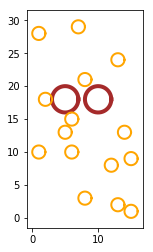

In [10]:
h= 30
D= 15
coordinates = {(i, j) for j in range(h+1) for i in range(D+1)}
data=nut(coordinates,2,15,2,1,2,1)# data has five arguments, they are the x and y components,radius, mass of a nut and number of iteration
plot_nut(data,1)
#print(PE(data))

the potential energy of the system is 618.03 J


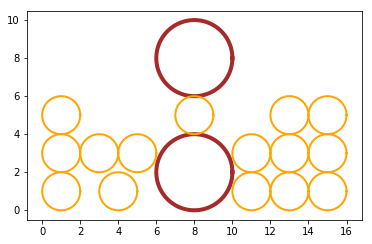

In [12]:
#print(Monte_Carlo_method(data,2,1,2,1,5))

coordinates = {(i, j) for j in range(h+1) for i in range(D+1)}
plot_nut(Monte_Carlo_method(data,2,1,2,1,200),1)
print("the potential energy of the system is",PE(data),'J')


# brazil nut effect after shaking

In [36]:
def shake(settled_particle):
    """This is a function to shake the nut in the box after settling them 
    shaking means multiplying the vertical component of each nut by 2"""
    print('shake it')
    for i in settled_particle:
        i[1]=i[1]+20 # multiply the y coordinate of all the nuts by 2 to simulate the effect of shaking
    
    return settled_particle

In [59]:
def Brazil_nut_effect(data,shake_times):
    """This is the code for brazil nut effect after shaking the container"""
    n=1
    while n<=shake_times:
        initial_energy = PE(data)
        data = Monte_Carlo_method(data,2,1,2,1,1)
        energy = PE(data)
        while initial_energy > energy: # stop iterations if the change of potential energy is insignificant
            initial_energy = energy
            data = Monte_Carlo_method(data,2,1,2,1,100) # use Monte Carlo method to settle particles
            energy = PE(data)
            #print(energy,initial_energy)
        #print("done")
        plot_nut(data,1) #plot the settled paricles
        settled_particle = shake(data)
        n+=1
        heights = []
        brazil_heights = []
        
        
        #store the height of the brazil nut or each ieration 
        for particle in data:
            if particle[4] == True:
                brazil_heights.append(particle[1]) 
            else:
                heights.append(particle[1])
        if max(heights) <= max(brazil_heights): # the loop will break once the brazil nut flows up to the surface
            print("It's at the top after shaking for", n-1, "times")
            break
        
                
        

# part 3

Start by putting one Brazil nut in, somewhere on the bottom of
the box. Then add, say ten other particles, each half the radius of
the nut, randomly positioned within the box horizontally but at
steadily increasing heights. Use the Monte Carlo model to ’settle’
all the particles, stopping when the change in potential energy in,
say, 1000 attempted jumps makes only a small difference to the
energy.
Then ’shake’ the box – multiply the vertical coordinate of each
atom by, say, 2. Settle again. See what has happened to the nut

In [67]:
h= 150
D= 25
coordinates = {(i, j) for j in range(h+1) for i in range(D+1)}

In [68]:
def condition_brazil(rb,Mb):
    """This is a function defined to place a brazil nut in,somewhere on the bottom of
    the box."""
    x_coord=random.randint(0+rb,D-rb) # x coordinate of brazil nut
    y_coord=rb# y coordinate of brazil nut
    Pb=np.array([x_coord,y_coord,rb,Mb,1])# position of the brazil nut
    return Pb
def condition_muesli(rb,rm,Mm,Nm):
    h_muesli_1=2*rb+rm # the lowest postion for the first muesli 
    particles=[] #list to store new muesli
    n=0
    while n<Nm:
        
        x_coord=random.randint(0+rm,D-rm) # x coordinate of muesli
        y_coord=h_muesli_1+2*rm*(n)# x coordinate of muesli
        Pm=np.array([x_coord,y_coord,rm,Mm,0]) # position of the muesli
        particles.append(Pm) #add each new position to the list
        n+=1
    return particles

In [69]:
def group_nuts(Nb,Nm,rb,rm,Mb,Mm):
    """this is a function will found the consistent position of each particle.
    Conditons: 1.particles do not overlap the sides or bottom of the box.
               2.two particles do not overlap
    one brazil nut at the bottom, 
    10 muesli with half the radius randomly positioned within the box horizontally but at steadily increasing heights.
    
    Nb stands for the number of brazil nut
    Nm stands for the number of muesli
    rb stands for the radius of the Brazil nut
    rm stands for the radius of the muesli
    Mb stands for the mass of the brazil nut
    Mm stands for the mass of the muesli"""
    particles=[] #a list to store all the 11 particles
    particles=condition_muesli(rb,rm,Mm,Nm)# generate one brazil nut
    particles.append(condition_brazil(rb,Mb)) # generate ten mueslis
    return particles

group_nuts=group_nuts(1,10,5,3,2,1) # generate 11 particles including 1 brazil nut and 10 mueslis

#### The following diagram is a system of one Brazil nut and ten muesli under the conditions: the Brazil nut is on the bottom and 10 muesli are above it with increasing height and random x coordinates. 

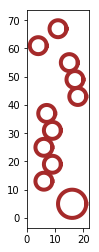

In [70]:
plot_nut(group_nuts,2)

#### The following diagram is a system of one Brazil nut and ten muesli under the conditions: the Brazil nut is on the bottom and 10 muesli are above it with increasing height and random x coordinates. Approximately 500 “jumps” for each shakes were conducted to settle all the particles. The lifting constant was set to be 2. The Brazil nut moved upwards by approximately 1.75 units in the system each time.

shake it
shake it
shake it
It's at the top after shaking for 3 times


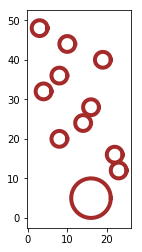

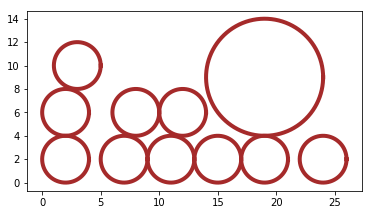

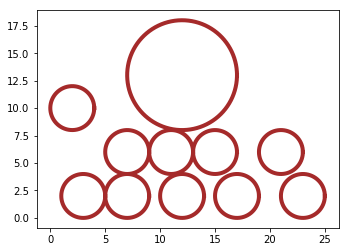

In [64]:
Brazil_nut_effect(group_nuts,10)